MNIST Handwriting Recogniton MLP Tensorflow Practice
===
Kenny Hsieh, 2018/3/16

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import pandas as pd

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
print('Train : ', mnist.train.num_examples)
print('Validation : ', mnist.validation.num_examples)
print('Test : ', mnist.test.num_examples)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train :  55000
Validation :  5000
Test :  10000


In [2]:
print('Train Images : ', mnist.train.images.shape)
print('Labels : ', mnist.train.labels.shape)

Train Images :  (55000, 784)
Labels :  (55000, 10)


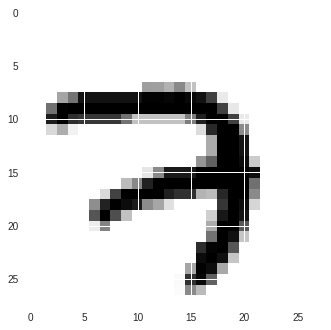

Label :  7


In [3]:
import matplotlib.pyplot as plt

def plot_image(image):
  plt.imshow(image.reshape(28, 28), cmap = 'binary')
  plt.show()
  
plot_image(mnist.train.images[0])
print('Label : ', np.argmax(mnist.train.labels[0]))

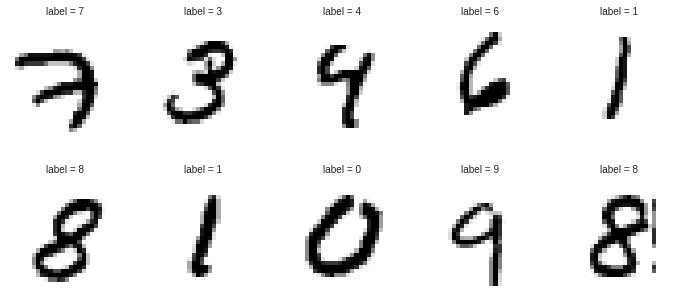

In [4]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(np.reshape(images[idx], (28, 28)), cmap = 'binary')
    title = 'label = ' + str(np.argmax(labels[idx]))
    
    if len(prediction) > 0:
      title += ", predict = " + str(prediction[idx])
    
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1
  plt.show()
  
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

In [0]:
def layer(output_dim, input_dim, inputs, activation = None):
  W = tf.Variable(tf.random_normal([input_dim, output_dim]))
  b = tf.Variable(tf.random_normal([1, output_dim]))
  XWb = tf.matmul(inputs, W) + b
  
  if activation == None:
    output = XWb
  else:
    output = activation(XWb)
  return output

In [6]:
# Input Layer
x = tf.placeholder("float", [None, 784])
# Hidden Layer
h1 = layer(1000, 784, x, tf.nn.relu)
h2 = layer(1000, 1000, h1, tf.nn.relu)
# Output Layer
y_predict = layer(10, 1000, h2, None)

# Label
y_label = tf.placeholder("float", [None, 10])

# Loss Function
loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        logits = y_predict, labels = y_label))

# Optimizier
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [14]:
epochs = 15
batch_size = 100
loss_list = []; epoch_list = []; accuracy_list = []

from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
  for i in range(batch_size):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {x : batch_x, y_label : batch_y})
  
  ## validate this epoch performance
  loss, acc = sess.run([loss_function, accuracy], feed_dict = {x : mnist.validation.images,
                                                           y_label : mnist.validation.labels})

  epoch_list.append(epoch)
  loss_list.append(loss)
  accuracy_list.append(acc)
  print("Train Epoch: ", '%02d' % (epoch + 1),
       ", Loss: ", '{:.9f}'.format(loss),
       ", Accuracy: ", acc)
  
duration = time() - startTime
print('Train Finished takes:', duration)

Train Epoch:  01 , Loss:  373.946502686 , Accuracy:  0.8122
Train Epoch:  02 , Loss:  254.761856079 , Accuracy:  0.8622
Train Epoch:  03 , Loss:  195.452621460 , Accuracy:  0.886
Train Epoch:  04 , Loss:  159.203720093 , Accuracy:  0.9036
Train Epoch:  05 , Loss:  146.940124512 , Accuracy:  0.9078
Train Epoch:  06 , Loss:  132.116134644 , Accuracy:  0.917
Train Epoch:  07 , Loss:  122.307624817 , Accuracy:  0.9226
Train Epoch:  08 , Loss:  110.877922058 , Accuracy:  0.9272
Train Epoch:  09 , Loss:  109.118949890 , Accuracy:  0.9262
Train Epoch:  10 , Loss:  99.616340637 , Accuracy:  0.9304
Train Epoch:  11 , Loss:  98.239265442 , Accuracy:  0.9326
Train Epoch:  12 , Loss:  93.978965759 , Accuracy:  0.9304
Train Epoch:  13 , Loss:  86.328330994 , Accuracy:  0.9386
Train Epoch:  14 , Loss:  94.811721802 , Accuracy:  0.9326
Train Epoch:  15 , Loss:  80.006675720 , Accuracy:  0.938
Train Finished takes: 6.778112173080444


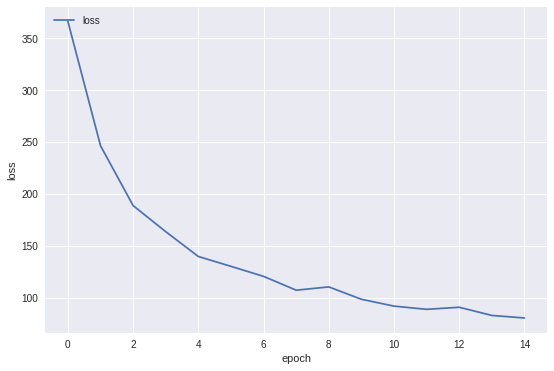

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc = 'upper left')

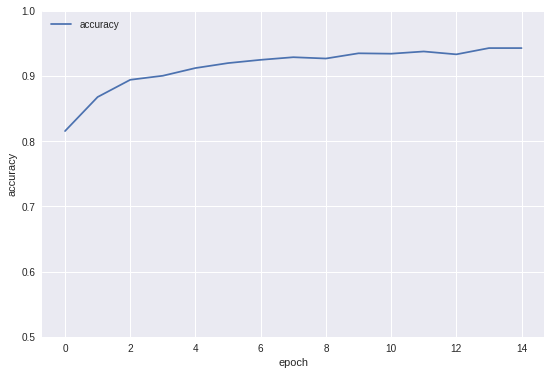

In [9]:
plt.plot(epoch_list, accuracy_list, label = 'accuracy')
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.ylim(0.5, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc = 'upper left')

In [10]:
print("Accuracy : ", sess.run(accuracy, feed_dict = {x : mnist.test.images, y_label : mnist.test.labels}))

Accuracy :  0.9372


In [11]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict = {x : mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 9, 9])

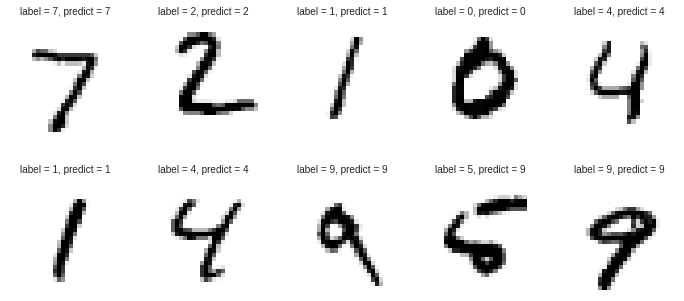

In [13]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)